In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [ ]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
def data_prepariation(data):
  data[['address_letter', 'adress_number']] = data['Address'].str.split('A', expand=True)
  data.drop(['Customer Id', 'Address', 'address_letter'], axis=1, inplace=True)
  data['Defaulted'] = data['Defaulted'].fillna(np.mean(data['Defaulted']))
  scaler = StandardScaler()
  col = data[['Age', 'Edu', 'Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio','adress_number']]
  data[['Age', 'Edu', 'Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio','adress_number']] = scaler.fit_transform(col)
  return data

In [ ]:
data = data_prepariation(data)
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,adress_number
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.655603,-0.576525,-1.069773
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.655603,0.391387,1.832580
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.852167,1.597554,0.671639
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.655603,-0.576525,0.091168
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.655603,-0.442507,-0.053950


In [ ]:
k_values = []

for k in range(1, 10):
  model = KMeans(n_clusters = k)
  model.fit(data)
  k_values.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

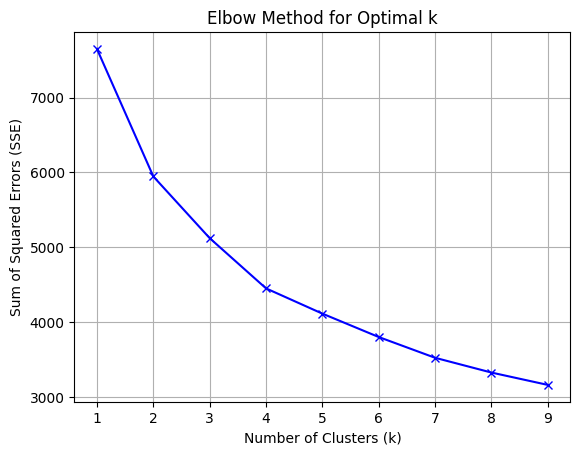

In [ ]:
plt.plot(range(1, 10), k_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [ ]:
last_model = KMeans(n_clusters =4)
last_model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
groups = model.labels_
print(np.unique(groups))

[0 1 2 3 4 5 6 7 8]


In [ ]:
inertia = model.inertia_
print(inertia)

3144.2144007198576
